# Part 2: Truncated SVD — Research and Conclusions

## Contents

[Pre-processing](#pre-processing) \
[Research](#research) \
[Results](#results)

In [3]:
import spacy, wordcloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from tqdm import tqdm

In [ ]:
nlp = spacy.load("en_core_web_md")
data_df = pd.read_csv("./Data/sample-data.csv")

data_df.head()

## Pre-processing

Same as in Part 1

In [ ]:
df = data_df.copy()
df["clean_docs"] = df["description"].str.replace(r"<[^>]*>", " ", regex=True)\
                                    .str.replace(r"[^a-zA-Z0-9']+", " ", regex=True)\
                                    .apply(lambda desc: nlp(desc.lower()))\
                                    .apply(lambda doc: [token.lemma_ for token in doc if token.text not in STOP_WORDS])\
                                    .apply(lambda ls: " ".join(ls))

In [ ]:
# I am not using a max or min document frequency for terms because I want to decide which cols to keep after the n-grams are made
vectoriser = TfidfVectorizer(stop_words="english", ngram_range=(1, 4))
X = vectoriser.fit_transform(df["clean_docs"])
len(vectoriser.vocabulary_)

80511

In [ ]:
dense = X.todense()
tfidf_df = pd.DataFrame(dense, 
                        columns=vectoriser.vocabulary_, 
                        index=[f"doc_{x}" for x in range(1, dense.shape[0]+1)])
tfidf_df.head()

,active,classic,boxer,reason,cult,favorite,cool,especially,sticky,situation,...,flat zip fly button,entry drop pocket welt,drop pocket welt pocket,welt pocket inseam update,pocket inseam update fit,inseam update fit fabric,update fit fabric oz,recycle program weight 282,program weight 282 oz,weight 282 oz thailand
doc_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doc_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doc_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doc_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doc_5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cols_more_than_one = [term for term in vectoriser.vocabulary_ if len(tfidf_df[tfidf_df[term] != 0.0]) > 1] # I checked that no elements were negative, but I used `!=` just to be sure.
denser_df = tfidf_df[cols_more_than_one]
denser_df.head()

,active,classic,boxer,reason,lightweight,travel,pack,expose,softness,traditional,...,flat zip fly button,entry drop pocket welt,drop pocket welt pocket,welt pocket inseam update,pocket inseam update fit,inseam update fit fabric,update fit fabric oz,recycle program weight 282,program weight 282 oz,weight 282 oz thailand
doc_1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doc_2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doc_3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doc_4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doc_5,0.0,0.0,0.0,0.0,0.019869,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Research

First, I would like to see which TF-IDF score threshold yields the most balanced categories, even if it means that we made the computation more difficult.

In [ ]:
start_threshold = 0
eligible_features = [term for term in denser_df.columns
                    if (denser_df[denser_df[term] > 0][term].mean() > start_threshold)]
current_df = denser_df[eligible_features]

best_spread_std = np.inf
best_threshold = 0
best_k = 0
best_components_spread = None
best_components_spread_std = 0
last_log = ""

for index, threshold in tqdm(enumerate([i/10_000 for i in range(start_threshold, 630)])): # 0.063 is the highest acceptable threshold I found in my earlier TF-IDF score threshold experiment
    eligible_features = [term for term in current_df.columns
                        if (current_df[current_df[term] > 0][term].mean() > threshold)]
    current_df = current_df[eligible_features]
    current_df_np = current_df.to_numpy()
    for k in range(10, 21):
        truncated_svd = TruncatedSVD(n_components=k, random_state=444719)
        lsa = truncated_svd.fit_transform(current_df_np)
        components_spread = [np.mean(lsa[:, col]) for col in range(k)]
        components_spread_std = np.std(components_spread)
        if components_spread_std < best_spread_std:
            best_spread_std = components_spread_std
            best_threshold = threshold
            best_k = k
            best_components_spread = components_spread
            best_components_spread_std = components_spread_std
            best_num_features = len(eligible_features)
    if index % 34 == 0:
        current_log = f"Best results so far:\nThreshold: {best_threshold}\nk: {best_k}\nComponents spread: {best_components_spread}\n" \
                    + f"Best std: {best_components_spread_std}\nBest num features: {best_num_features}\n\n"
        if current_log != last_log:
            last_log = current_log
            print(current_log)

1it [00:21, 21.06s/it]

Best results so far:
Threshold: 0.0
k: 20
Components spread: [np.float64(0.14047094158389076), np.float64(0.06812658676295107), np.float64(-0.013352768541905334), np.float64(-0.00026403994130880595), np.float64(0.006098115040602035), np.float64(0.01620872966625409), np.float64(0.009025969846483047), np.float64(-0.0003137408876439437), np.float64(-0.0005842546960075075), np.float64(0.0012083520736680669), np.float64(-0.006815432566807905), np.float64(0.0009302829657768676), np.float64(0.0011208162505799684), np.float64(0.008489807995399355), np.float64(0.004175832391466278), np.float64(-0.0032579907492408934), np.float64(0.006290283053269684), np.float64(0.005720505355198885), np.float64(-0.002666999878774032), np.float64(4.753741240476384e-05)]
Best std: 0.033367081505745785
Best num features: 23757




103it [36:28, 20.23s/it]

Best results so far:
Threshold: 0.0102
k: 20
Components spread: [np.float64(0.1399695358747763), np.float64(0.0683662293647615), np.float64(-0.013434706567473784), np.float64(-0.0002881472427435874), np.float64(0.006134837742305763), np.float64(0.016321664092037617), np.float64(0.0089635484898378), np.float64(-0.00027362838436706036), np.float64(-0.0005557477471178833), np.float64(0.0012302335334276745), np.float64(-0.006818444095866024), np.float64(0.0009295045808419364), np.float64(0.0010999992599135533), np.float64(0.00847885135332752), np.float64(0.004220591199771268), np.float64(-0.0032421853090238892), np.float64(0.006335648502454922), np.float64(0.005639051331249507), np.float64(-0.0029852944400564113), np.float64(2.9603071858367748e-05)]
Best std: 0.03330089131430267
Best num features: 23756




137it [47:45, 15.02s/it]

Best results so far:
Threshold: 0.0134
k: 20
Components spread: [np.float64(0.1383815877986671), np.float64(0.06907086866001058), np.float64(-0.013491938249933284), np.float64(-0.000576928249045245), np.float64(0.006494729319403132), np.float64(0.016397623191476727), np.float64(0.008821453169532758), np.float64(-0.0002538325748666019), np.float64(-0.0004368543029165597), np.float64(0.0013001360614986804), np.float64(-0.006906410507200637), np.float64(0.0008497883936134853), np.float64(0.001125867744352282), np.float64(0.008482210844985004), np.float64(0.004341219107382724), np.float64(-0.003229088954675623), np.float64(0.006366302275439114), np.float64(0.005470557726982771), np.float64(-0.0036681557964460725), np.float64(8.551858131735645e-07)]
Best std: 0.0330780866568822
Best num features: 23752




205it [1:05:11, 16.22s/it]

Best results so far:
Threshold: 0.0177
k: 20
Components spread: [np.float64(0.1366408344644486), np.float64(0.07008937005541145), np.float64(-0.013782182375329587), np.float64(-0.0007918896509663038), np.float64(0.0063961439425083335), np.float64(0.01669081900094964), np.float64(0.008996410363948052), np.float64(0.0002586250003904467), np.float64(-0.00046963496298670695), np.float64(0.001276057556162333), np.float64(-0.006883882431293317), np.float64(0.0008341640917259008), np.float64(0.0009668928008598065), np.float64(0.008552124929710445), np.float64(0.0043841012108285825), np.float64(-0.0032641663525128767), np.float64(0.006391722462219676), np.float64(-0.005089290343945421), np.float64(-0.004400773067642862), np.float64(-1.8037798439997753e-05)]
Best std: 0.03304762723517278
Best num features: 23751




239it [1:14:10, 15.26s/it]

Best results so far:
Threshold: 0.0237
k: 20
Components spread: [np.float64(0.13289268056578654), np.float64(0.07179825015834182), np.float64(-0.01487862453229746), np.float64(-0.0010969674912351237), np.float64(0.006509055654655227), np.float64(0.017230296204733656), np.float64(0.008694775320500024), np.float64(0.0003636952463656564), np.float64(-0.0003758979407812777), np.float64(0.001345584215194665), np.float64(-0.007068154263067994), np.float64(0.0007620528081412055), np.float64(0.0013447632186690034), np.float64(0.008650808872429923), np.float64(0.00433176948266268), np.float64(-0.003395992011751927), np.float64(0.00635437024235712), np.float64(0.00591752184048618), np.float64(-0.0034588846642535425), np.float64(0.00031789118104485006)]
Best std: 0.03233377691167351
Best num features: 23742




273it [1:22:40, 15.26s/it]

Best results so far:
Threshold: 0.0272
k: 20
Components spread: [np.float64(0.09232414323606739), np.float64(0.09145538140885281), np.float64(-0.01961993875083938), np.float64(0.0019168526193574476), np.float64(0.013097188126471189), np.float64(0.015333585679476286), np.float64(0.008487175637726423), np.float64(-0.00158545590835862), np.float64(0.003897175283283774), np.float64(-0.005651100644513803), np.float64(0.006945574330837591), np.float64(0.0020481700194318066), np.float64(0.003668536396521067), np.float64(0.006383776220623935), np.float64(-0.001659511004887584), np.float64(0.008413507221113491), np.float64(-0.0019879253950660916), np.float64(5.70573969471323e-05), np.float64(0.011608847887272436), np.float64(-0.000839311301862358)]
Best std: 0.027730587473295633
Best num features: 23029




307it [1:30:50, 15.37s/it]

Best results so far:
Threshold: 0.0284
k: 20
Components spread: [np.float64(0.09163485149222714), np.float64(0.0915612816139203), np.float64(-0.01991162197601508), np.float64(0.0016670539813711063), np.float64(0.012947415504361508), np.float64(0.015286379855721748), np.float64(0.00846181470665748), np.float64(-0.0013162031161146803), np.float64(0.0037666044972692173), np.float64(-0.005923073375566729), np.float64(0.006909559907096921), np.float64(0.003137064031630725), np.float64(0.0036725365467144013), np.float64(0.005924836023569585), np.float64(-0.0017951965387830845), np.float64(0.008513019634197648), np.float64(0.0012395738204151164), np.float64(0.00014767667960959098), np.float64(0.01176182655011126), np.float64(0.0004991501807488416)]
Best std: 0.027558122707787812
Best num features: 22982




341it [1:38:48, 13.56s/it]

Best results so far:
Threshold: 0.034
k: 20
Components spread: [np.float64(0.07945589428526587), np.float64(0.08881142251836412), np.float64(-0.02381184579584061), np.float64(0.006836823682157433), np.float64(-0.006235437087953935), np.float64(0.011757807505675441), np.float64(0.010152406298986519), np.float64(-0.0006709365599415139), np.float64(0.0037197750317611872), np.float64(-0.011812204770595318), np.float64(0.002098489175676073), np.float64(-0.001442729120838755), np.float64(-0.009100618595030715), np.float64(0.002282471051484131), np.float64(0.002894148360153684), np.float64(-5.318635512558734e-05), np.float64(0.011991187154027262), np.float64(-0.0006266551980126117), np.float64(-0.0005344284080553798), np.float64(0.002391001581013743)]
Best std: 0.0265411082527899
Best num features: 21729




375it [1:46:19, 13.46s/it]

Best results so far:
Threshold: 0.0368
k: 20
Components spread: [np.float64(0.07569113915963896), np.float64(0.08528462927555198), np.float64(0.021180115303379984), np.float64(0.0069438946828912764), np.float64(0.014856629640494858), np.float64(0.012413189674376867), np.float64(0.008113897764648749), np.float64(0.0008171747386176538), np.float64(0.0019955096177687835), np.float64(-0.010222068290543663), np.float64(0.005436808920170089), np.float64(-0.004099363733417434), np.float64(-0.005090764413048644), np.float64(0.005727877649604796), np.float64(-0.003768266905129104), np.float64(0.012303043851353564), np.float64(0.003244696466601069), np.float64(-0.002142104880225183), np.float64(-0.001028906049488768), np.float64(0.003696057835957119)]
Best std: 0.02415935445823175
Best num features: 20600




409it [1:52:44, 10.77s/it]

Best results so far:
Threshold: 0.0408
k: 20
Components spread: [np.float64(0.07132340405633887), np.float64(0.06635888278957978), np.float64(0.014778242148171217), np.float64(0.011132360376067322), np.float64(0.015584446038375692), np.float64(0.004834649348395685), np.float64(-0.00372543837412934), np.float64(0.028972377593842125), np.float64(-0.006941600220971932), np.float64(0.0013481517188060309), np.float64(0.007768585433366266), np.float64(-0.008124214439225569), np.float64(0.0008237276566607614), np.float64(-0.012239161331170905), np.float64(0.007231100669937356), np.float64(0.006010506830201343), np.float64(-0.003150460710663846), np.float64(-0.0017299771556294743), np.float64(0.0009866358113665692), np.float64(-0.002713837982581643)]
Best std: 0.02170047227854109
Best num features: 18188




443it [1:57:57,  7.47s/it]

Best results so far:
Threshold: 0.0442
k: 20
Components spread: [np.float64(0.06668254575619371), np.float64(0.0513807066164983), np.float64(0.013297905451861498), np.float64(-0.008942588406297771), np.float64(0.008377908229284255), np.float64(0.0036002641668054928), np.float64(0.009155690183736827), np.float64(0.023938782456321216), np.float64(0.010960111126266592), np.float64(0.013771326877517807), np.float64(-0.0008784753008170026), np.float64(0.0019566106313830527), np.float64(0.019803747167736894), np.float64(0.0006706985640088759), np.float64(0.006678742561113502), np.float64(-0.0019904045856144986), np.float64(0.004243578316197567), np.float64(0.002688933737084004), np.float64(-0.0025667169716700774), np.float64(-0.0020660305512950864)]
Best std: 0.01794190305185
Best num features: 15370




477it [2:02:15,  6.59s/it]

Best results so far:
Threshold: 0.0464
k: 20
Components spread: [np.float64(0.0612702242490211), np.float64(0.009408798092239408), np.float64(0.03754779991544292), np.float64(0.02592666951865339), np.float64(0.023086383700375565), np.float64(0.004338885119688026), np.float64(0.007677098158955397), np.float64(0.018223851579119193), np.float64(-0.007017172445866586), np.float64(0.01982554906352837), np.float64(-0.0026732942727063403), np.float64(0.009201449210134747), np.float64(0.013635189885176953), np.float64(-0.002868465615554063), np.float64(0.00021923740461530472), np.float64(0.006305962796065449), np.float64(0.007684204014411026), np.float64(0.001962917432011384), np.float64(0.001096970047386363), np.float64(0.012266604869986892)]
Best std: 0.015486609271141044
Best num features: 13554




511it [2:05:29,  4.99s/it]

Best results so far:
Threshold: 0.051
k: 20
Components spread: [np.float64(0.056629518960735696), np.float64(0.010429813912573126), np.float64(0.021163192615454598), np.float64(0.024373319379906014), np.float64(0.029545777699936736), np.float64(0.012595852637961811), np.float64(0.00411422720586375), np.float64(0.008468501468291064), np.float64(0.008207179729894555), np.float64(0.020176555311714993), np.float64(0.012398225313987436), np.float64(-0.003918599532516799), np.float64(-0.0021588191675538005), np.float64(0.006287735237116033), np.float64(-0.0030439804251537277), np.float64(0.00013503900904491317), np.float64(0.0011828853441575662), np.float64(0.008143831055182429), np.float64(0.0007771716579883734), np.float64(0.0035243081683602197)]
Best std: 0.013886823559100469
Best num features: 9442




545it [2:07:51,  3.60s/it]

Best results so far:
Threshold: 0.0544
k: 13
Components spread: [np.float64(0.054647458696258366), np.float64(0.008789553472771472), np.float64(0.020438582491608907), np.float64(0.013426460492924622), np.float64(0.02116073740746656), np.float64(0.02588609402248959), np.float64(0.00853431153090122), np.float64(0.009037185719013926), np.float64(0.00783346182609511), np.float64(0.018950066577050863), np.float64(0.00018704058013235868), np.float64(0.007248960856909454), np.float64(0.009362610349053398)]
Best std: 0.013144542091268165
Best num features: 7424




579it [2:09:34,  2.56s/it]

Best results so far:
Threshold: 0.0555
k: 15
Components spread: [np.float64(0.05415515691307205), np.float64(0.009956781135149464), np.float64(0.019453095562975135), np.float64(0.013282356328283824), np.float64(0.02090182992767103), np.float64(0.025845262532115384), np.float64(0.008037433995611633), np.float64(0.010881050198299966), np.float64(0.005219976519392281), np.float64(0.019104881262923885), np.float64(0.002137995843707909), np.float64(0.0015548008143451161), np.float64(0.010906223951418976), np.float64(0.00609960245491058), np.float64(0.004285020666768967)]
Best std: 0.01279882071019301
Best num features: 6924




613it [2:10:51,  2.03s/it]

Best results so far:
Threshold: 0.0612
k: 19
Components spread: [np.float64(0.02826171211738037), np.float64(0.01793585257275685), np.float64(0.01611104922931948), np.float64(0.01563930480442991), np.float64(-0.0012269881289626939), np.float64(0.00984510479572594), np.float64(0.016051260312394653), np.float64(0.012063606426195748), np.float64(0.004389637052636587), np.float64(0.007224820728596649), np.float64(-0.0002690862059650097), np.float64(0.0079228909321151), np.float64(0.0018573651257871538), np.float64(0.012241429662293742), np.float64(0.00119267197099323), np.float64(0.006934836011276444), np.float64(0.0014935382301117443), np.float64(0.004609093487181921), np.float64(0.005171833314855906)]
Best std: 0.007390486865796911
Best num features: 4371




630it [2:11:27, 12.52s/it]


Let's see what the winning parameters gave us exactly:

In [ ]:
eligible_features = [term for term in denser_df.columns
                     if (denser_df[denser_df[term] > 0][term].mean() > 0.0612)]
current_df = denser_df[eligible_features]
truncated_svd = TruncatedSVD(n_components=19, random_state=444719)
lsa = truncated_svd.fit_transform(current_df)

In [ ]:
topic_encoded_df = pd.DataFrame(lsa, columns = [f"topic_{topic_num}" for topic_num in range(1, lsa.shape[1]+1)])
topic_encoded_df["clean_docs"] = df['clean_docs']
topic_encoded_df.head()

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,clean_docs
0,0.000273,0.000306,0.000502,0.002243,0.000189,0.000079,0.005264,-0.001227,0.000260,0.000292,0.000811,0.009166,0.002204,0.033908,-0.006842,-0.011556,-0.001225,0.002726,0.002192,active classic boxer reason boxer cult favorit...
1,0.000372,0.001256,0.000618,0.000363,0.000353,0.000272,0.013602,-0.003518,-0.000353,-0.000589,0.001119,0.001979,0.000757,0.007868,-0.002075,-0.003345,0.000562,0.000952,0.004372,active sport boxer brief skin glory require mo...
2,0.000180,0.000773,0.000198,0.000203,0.000115,0.000256,0.013192,-0.003415,-0.000451,-0.000531,0.000554,0.000359,0.000345,-0.001214,0.000466,0.001228,0.000506,0.000328,0.003628,active sport brief superbreathable fly brief m...
3,0.000088,0.004350,0.000015,-0.000143,-0.006460,0.000104,0.001841,0.002398,0.000307,0.000367,-0.007045,0.000579,0.001917,0.002628,0.000662,0.002230,0.001254,-0.000506,0.001728,alpine guide pant skin climb ice switch rock t...
4,0.000142,0.001975,0.000036,0.000242,-0.002451,0.000233,0.011385,-0.000775,-0.000266,-0.000264,-0.003042,0.001216,0.003280,0.005852,0.003597,0.010750,-0.001395,0.001786,0.008504,alpine wind jkt high ridge steep ice alpine ja...


The results are difficult to interpret through the means provided in our lessons, due to the high numbers of features and samples.

Let's see if I can make out a few patterns by sorting the feature-indexed table we saw in the lesson on LSA, by the max topic value.

In [ ]:
topic_names = [f"topic_{topic_num}" for topic_num in range(1, lsa.shape[1]+1)]
topic = pd.DataFrame(truncated_svd.components_, index = topic_names)
topic.columns = current_df.columns
topic_t = topic.transpose()
topic_t["max"] = topic_t.apply(lambda row: max(row[topic_names]), axis=1)
topic_t.sort_values(inplace=True, by=["max"], ascending=False)
topic_t.head(20)

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,max
flatter midriff,0.007073,0.016973,0.003255,0.511488,-0.000401,-0.034840,-0.005565,-0.007591,-0.004158,-0.004185,-0.013234,-0.005246,0.003849,-0.008329,0.000313,-0.007907,-0.001782,-0.000537,-0.001530,0.511488
tester,0.000628,0.002258,0.000757,0.007519,-0.009607,-0.000711,0.107119,0.351760,-0.007952,-0.006515,0.003327,0.000573,-0.003389,-0.005396,-0.002766,-0.002172,0.009980,0.023631,0.064822,0.351760
closure classic flat,0.004606,0.011576,0.002206,0.332526,0.001018,-0.023706,-0.002030,0.000104,-0.002180,-0.002894,-0.008861,-0.002416,0.007199,-0.004681,-0.001829,-0.006374,-0.004528,0.011929,0.005301,0.332526
earn unanimous,0.000545,0.001459,0.000692,0.007077,-0.006633,-0.000772,0.094335,0.310990,-0.007213,-0.005834,0.003261,0.000111,-0.002852,-0.005257,-0.002498,-0.002199,0.006603,0.015325,0.046203,0.310990
grass,0.000155,0.000697,0.000470,0.013899,-0.003826,0.310626,-0.012605,0.001554,-0.071122,-0.068664,-0.002834,-0.000456,0.000383,0.000599,-0.000101,-0.000743,-0.002393,-0.002996,0.000139,0.310626
drop pocket capri length,0.000155,0.000697,0.000470,0.013899,-0.003826,0.310626,-0.012605,0.001554,-0.071122,-0.068664,-0.002834,-0.000456,0.000383,0.000599,-0.000101,-0.000743,-0.002393,-0.002996,0.000139,0.310626
35 organic cotton ventilate,0.000205,0.000781,0.000606,0.013730,-0.003530,0.307964,-0.012257,0.001603,-0.065996,-0.063630,-0.003288,0.000104,0.000913,-0.000324,-0.000846,-0.001761,-0.000304,-0.002206,0.001078,0.307964
pant torrentshell open,0.000625,0.003199,0.001024,0.003875,-0.003844,0.002640,0.005593,0.000425,0.000699,0.001318,-0.010994,0.015489,0.030271,0.161257,0.093992,0.305931,-0.018864,-0.011272,-0.042692,0.305931
make easy,0.000502,0.001446,0.000693,0.007243,-0.006625,-0.000800,0.091571,0.302317,-0.007049,-0.005400,0.003389,-0.000147,-0.002799,-0.004498,-0.002256,-0.001793,0.003215,0.007120,0.028527,0.302317
blend fast wicke quick,0.000300,0.001202,0.000534,0.001790,0.001471,0.001146,0.041200,-0.011890,-0.000273,-0.000060,0.009195,0.030846,0.011370,0.290303,-0.076342,-0.141532,-0.007228,0.002448,-0.009778,0.290303


There clearly are spikes in the different values, indicating that at least some features strongly define a topic, but it's still hard to read.

## Results

As requested, each document's main topic:

In [ ]:
main_topic_df = df[["id", "description", "clean_docs"]]
topic_names = [f"topic_{topic_num}" for topic_num in range(1, lsa.shape[1]+1)]
main_topic_df["main_topic"] = topic_encoded_df.apply(lambda row: topic_names[np.argmax(row[topic_names])], axis=1)
main_topic_df.head()

,id,description,clean_docs,main_topic
0,1,Active classic boxers - There's a reason why o...,active classic boxer reason boxer cult favorit...,topic_14
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer brief skin glory require mo...,topic_7
2,3,Active sport briefs - These superbreathable no...,active sport brief superbreathable fly brief m...,topic_7
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pant skin climb ice switch rock t...,topic_2
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt high ridge steep ice alpine ja...,topic_7


To help read all the data above, let's try and see to what extent the topics match the clusters we found earlier:

In [2]:
best_labels_df = pd.read_csv("../../Data/best_labels_data.csv")

In [ ]:
main_topic_cluster_correlation = dict()
best_clusters = best_labels_df["labels"].unique()
best_clusters.sort()
for cluster in best_clusters:
    main_topics_in_cluster = main_topic_df[best_labels_df.labels == cluster]["main_topic"]
    col_vals = [len(main_topics_in_cluster[main_topics_in_cluster == topic]) for topic in topic_names]
    main_topic_cluster_correlation[f"cluster_{cluster}"] = col_vals

main_topic_cluster_correlation_df = pd.DataFrame(main_topic_cluster_correlation,
                                                 index=topic_names)
main_topic_cluster_correlation_df

,cluster_-1,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16
topic_1,4,0,1,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0
topic_2,2,2,3,13,0,0,1,0,0,0,0,1,0,0,0,0,0,0
topic_3,0,0,0,0,0,0,0,2,46,0,0,0,0,0,0,0,0,0
topic_4,0,0,1,0,0,0,1,0,0,1,0,0,8,15,0,0,0,0
topic_5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
topic_6,1,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0
topic_7,4,6,1,0,1,0,7,2,0,0,0,20,0,0,0,2,0,7
topic_8,5,42,12,0,1,2,2,5,0,0,0,0,0,0,7,0,0,0
topic_9,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0
topic_10,2,0,0,0,0,0,3,0,4,1,0,0,0,0,0,0,0,0


It seems like there is some degree of correlation between the two, but it isn't perfect. For instance, it seems that both topic_1 and topic_3 have a spike on cluster_7 (the biggest cluster).
```md
topic_1: 7
topic_2: 2
topic_3: 7
topic_4: 12
topic_5: Absent
topic_6: 8
topic_7: 10
topic_8: 0
topic_9: 8
topic_10: No big spike. The max value is on 7 as well.
topic_11: No big spike. The max value is on 14.
topic_12: 6
topic_13: No big spike. The max value is on 2.
topic_14: No big spike. The max value is on 6.
topic_15: 7?
topic_16: 5
topic_17: No max value
topic_18: 3
topic_19: No big spike. The max value is on 9.
```
Looking for spikes cluster by cluster is a little more conclusive, but not a lot more.

Let's have a look at some word clouds.


topic_14


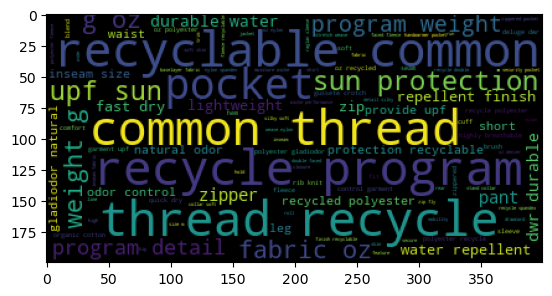

topic_7


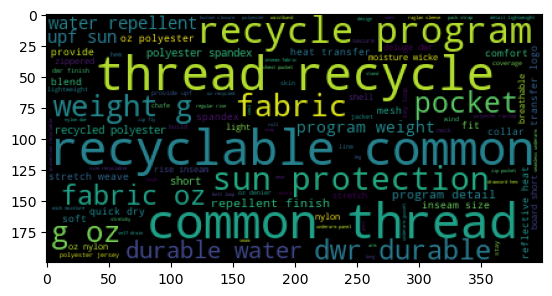

topic_2


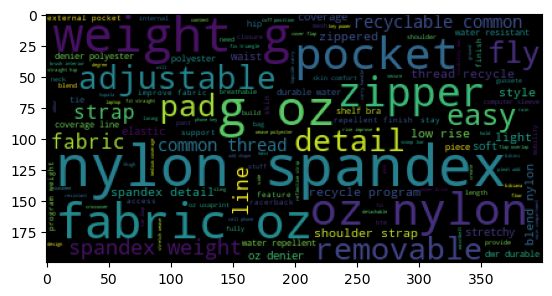

topic_8


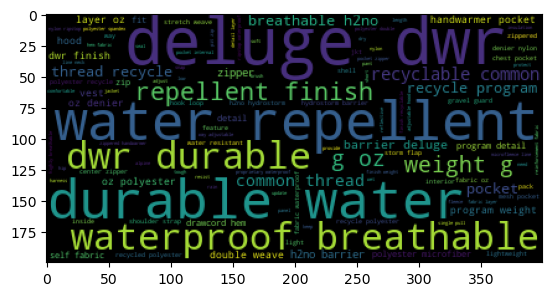

topic_12


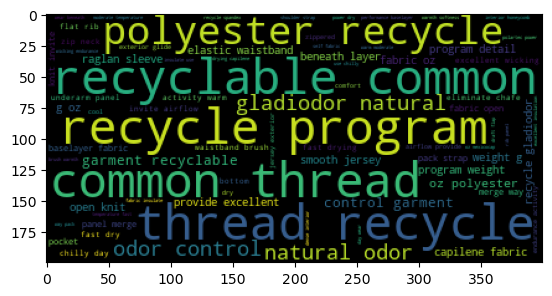

topic_19


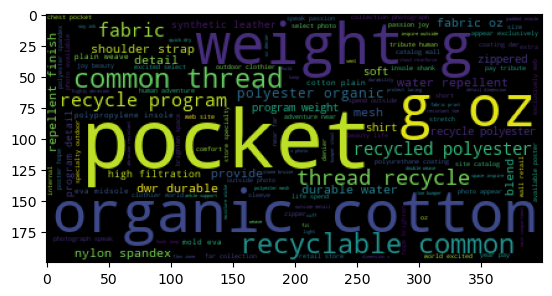

topic_18


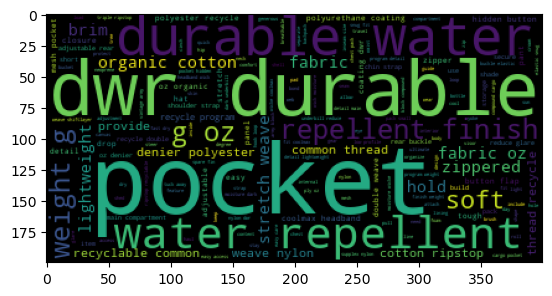

topic_16


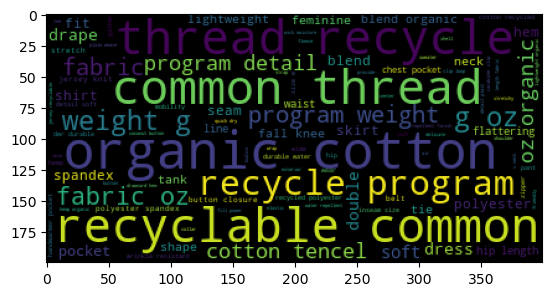

topic_10


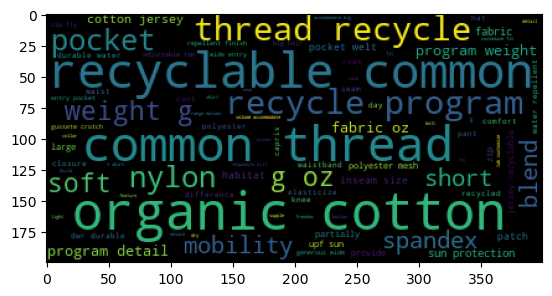

topic_3


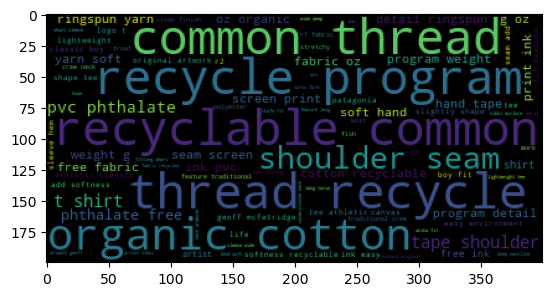

topic_9


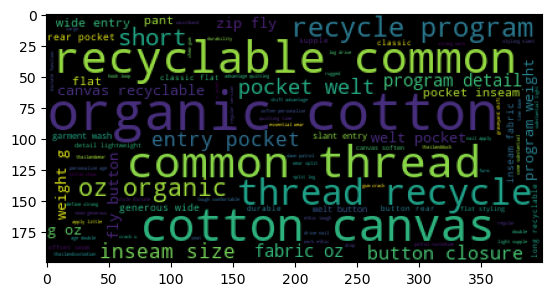

topic_4


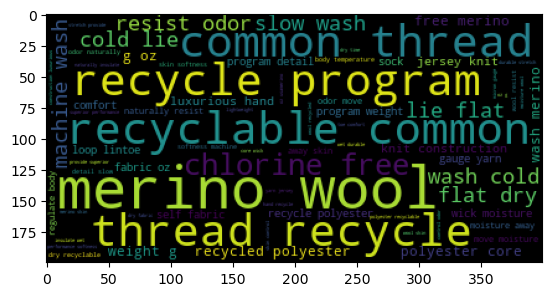

topic_13


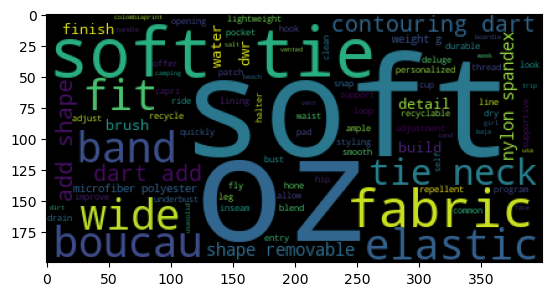

topic_1


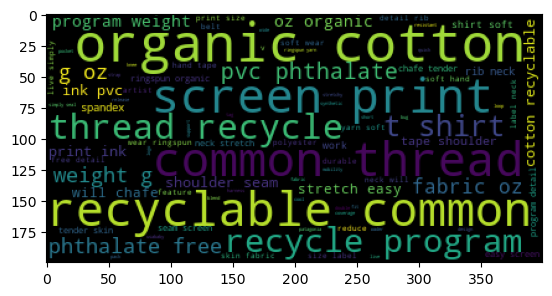

topic_15


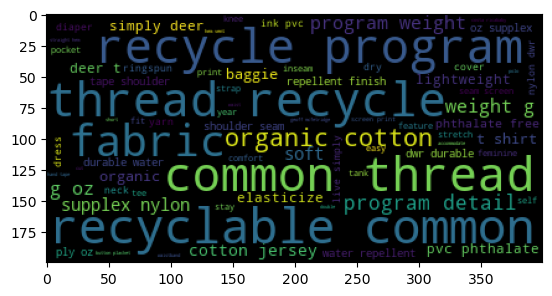

topic_6


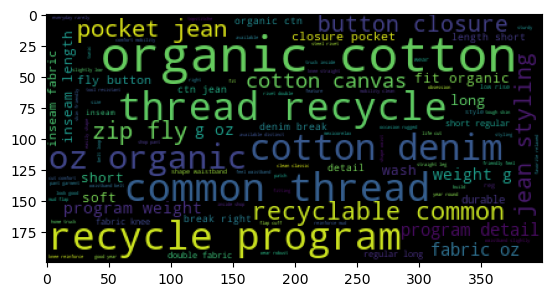

topic_17


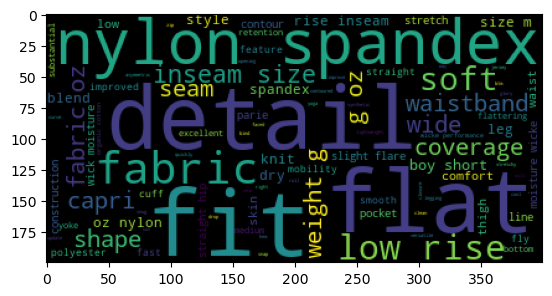

topic_11


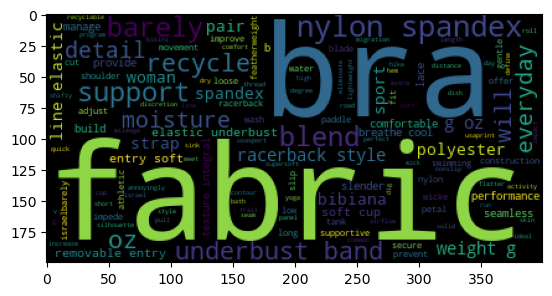

In [ ]:
main_topics = main_topic_df.main_topic.unique()

for topic in main_topics:
    all_lemmas = "".join(main_topic_df[main_topic_df.main_topic == topic]["clean_docs"].to_list())
    wd = wordcloud.WordCloud()
    cloud = wd.generate(all_lemmas)
    print(topic)
    plt.imshow(cloud)
    plt.show()

While we can draw insights from the word clouds—topic_8 is durable and very waterproof, topic_18 wants you to know it has pockets and it's important, topic_11 has bras made of fabric,...— some topics don't appear in the list of each document's main topic, and even then, some topics (such as topics 15 and 6) don't seem to stand out in any major way from other topics.